<a href="https://colab.research.google.com/github/kaylangu/kmc/blob/main/assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/kaylangu/kmc/main/data/airbnb_hw.csv')

df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

df = df.loc[:,['price','beds','n_reviews','score']]

df.head()

,price,beds,n_reviews,score
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0


In [3]:
df['price'].value_counts()
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

df['beds'] = df['beds'].fillna(1)
df['beds'].describe()

count    30478.000000
mean         1.528611
std          1.014327
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: beds, dtype: float64

In [4]:
df = df.dropna()
df.describe()

,price,beds,n_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [5]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

X = df.drop('price',axis=1)
X = df.apply(maxmin)

In [6]:
from sklearn.cluster import KMeans # k means algo
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=150, n_init = 10, random_state=0)
model = model.fit(X)
X['cluster'] = model.labels_

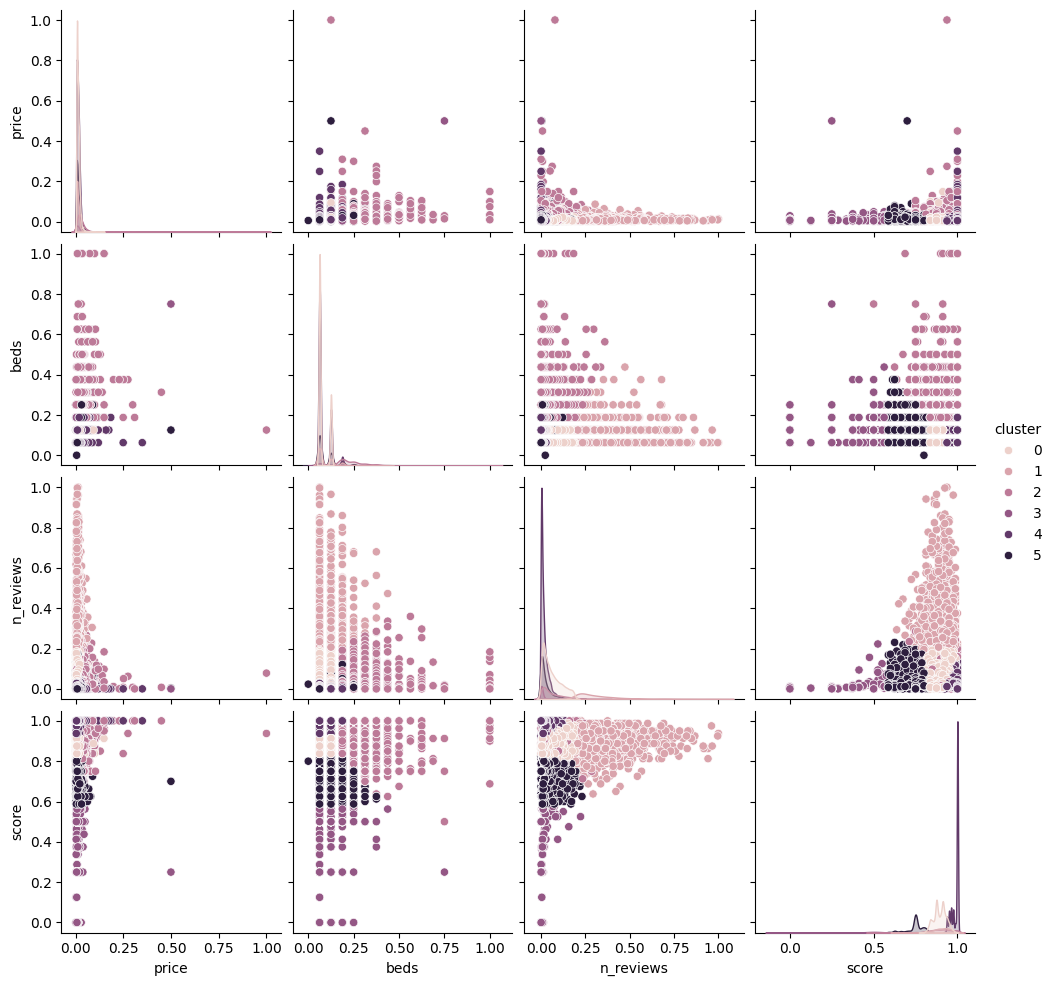

In [7]:
sns.pairplot(data=X,hue='cluster') # examining interrelationships of variables

In [8]:
df['cluster'] = model.labels_
df.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                            
          count        mean         std   min    25%    50%    75%      max
cluster                                                                    
0        7489.0  136.487649   79.355269  22.0   82.0  120.0  175.0   1495.0
1        1771.0  135.083569   78.124649  27.0   85.0  120.0  170.0    875.0
2        1764.0  298.988662  352.290537  27.0  150.0  227.0  350.0  10000.0
3         409.0  129.951100  255.342268  25.0   60.0   90.0  150.0   5000.0
4        7847.0  154.004588  113.995579  10.0   85.0  130.0  195.0   3500.0
5        2875.0  131.788174  123.434199  20.0   70.0  109.0  165.0   5000.0

5. Cluster 2 seems to have the highest prices, with the highest mean, maximum, yet a relatively high standard deviation. Regardless, it has the highest mean by quite a bit.

Text(0.5, 1.0, 'Scree Plot')

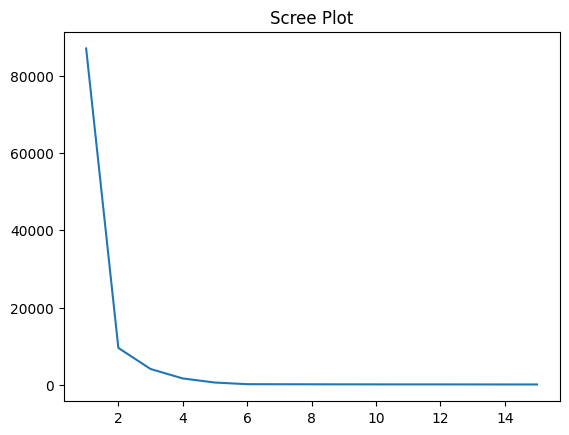

In [9]:
import numpy as np
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # from notes: records sse

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

price                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        11131.0  0.013752  0.012498  0.000000  0.007007  0.011512  0.017518   
1         7489.0  0.012661  0.007943  0.001201  0.007207  0.011011  0.016517   
2         3535.0  0.020708  0.026802  0.001702  0.009009  0.015015  0.024024   

                   
              max  
cluster            
0        0.499499  
1        0.148649  
2        1.000000

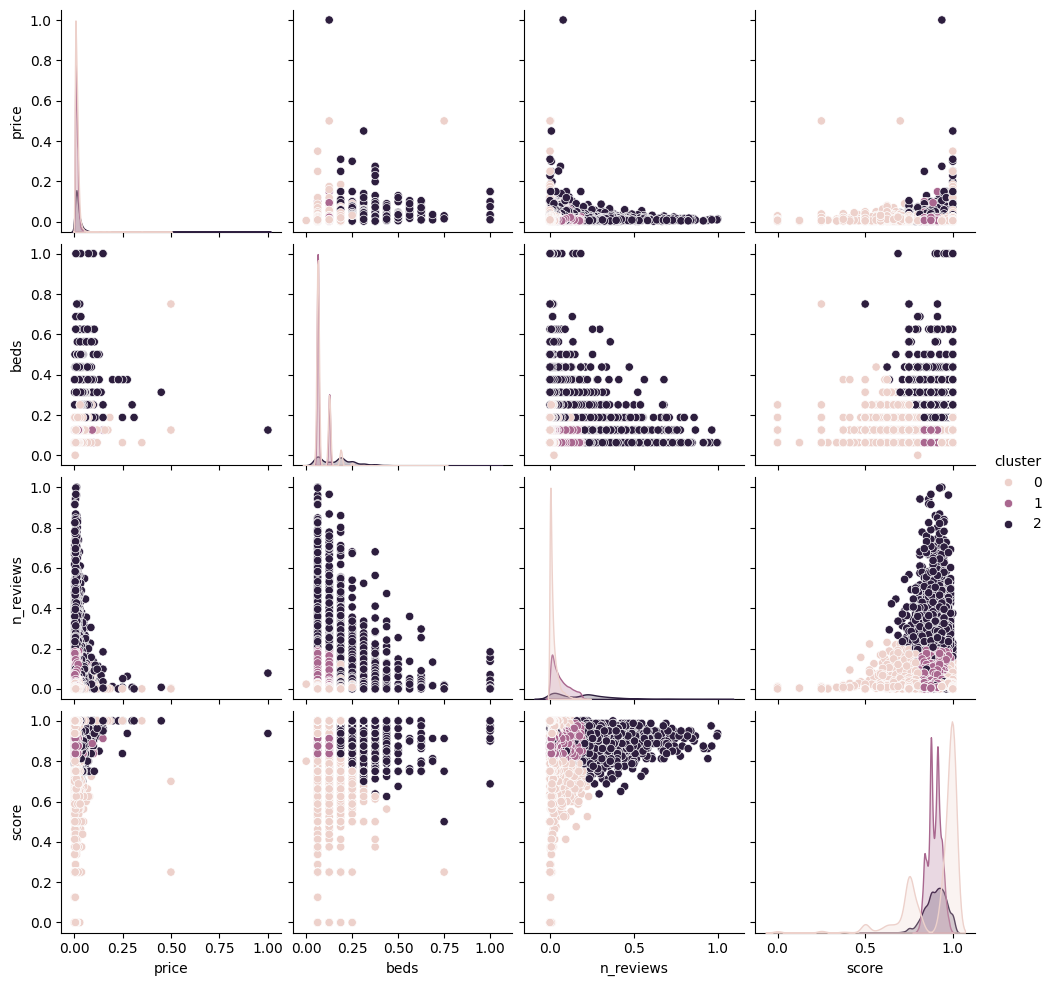

In [10]:
# taking value3 clusters based on elbow method
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(X)
X['cluster'] = model.labels_

sns.pairplot(data=X,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

6. Cluster 2 seems to have the highest price, with the highest mean yet again!

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [14]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

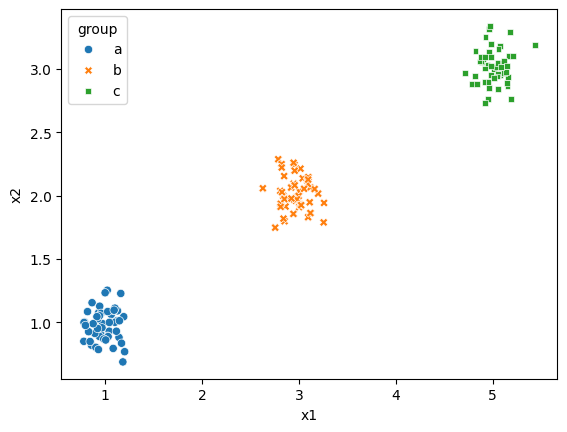

In [15]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

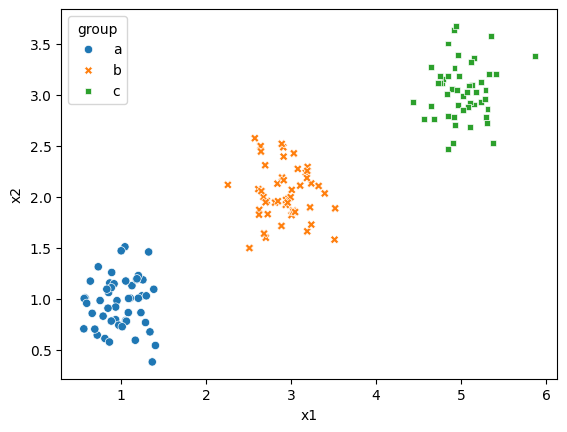

In [21]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

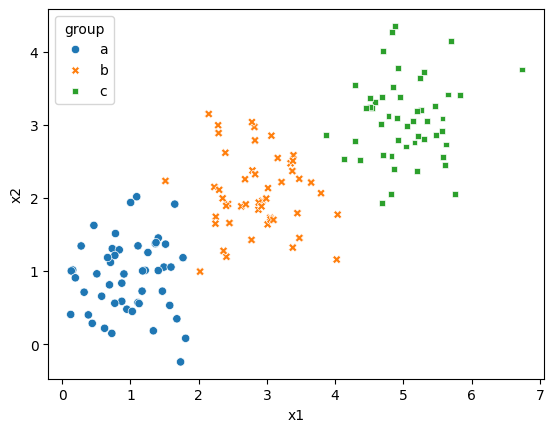

In [22]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

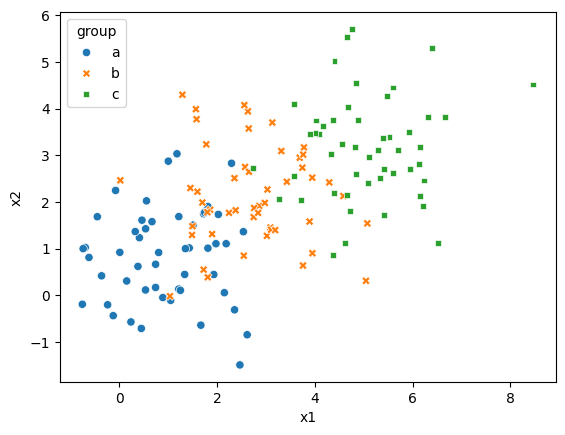

In [23]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

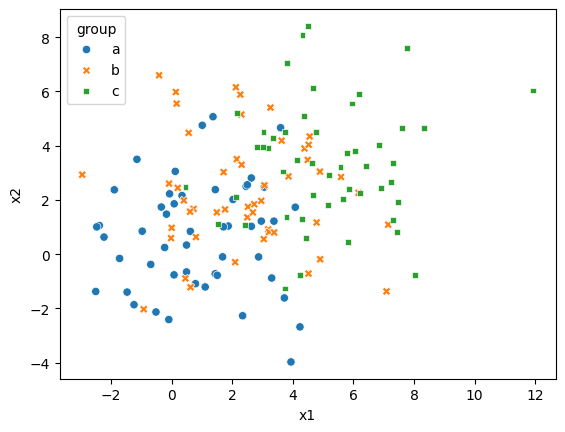

In [24]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As noise goes from 0.125 to 2, the visual distinctness of the clusters decreases as there seems to be less correlation among groups as noise increases.

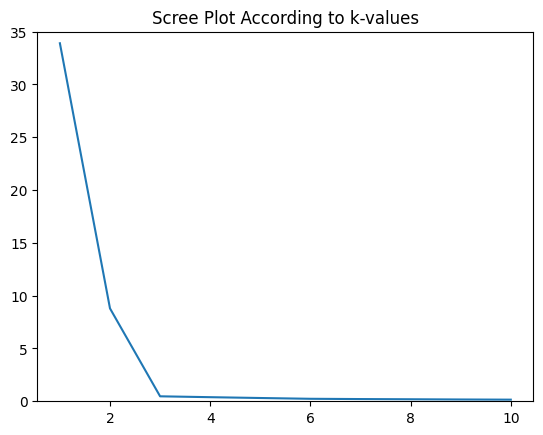

In [31]:
def maxmin(x): # not normalization with u, in place
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    k_ind = 10
    k_grid = np.arange(1, k_ind+1)
    SSE = np.zeros(k_ind)
    for k in range(k_ind):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot According to k-values')
    axes.set_ylim(0, 35)

scree(data = df0_125)

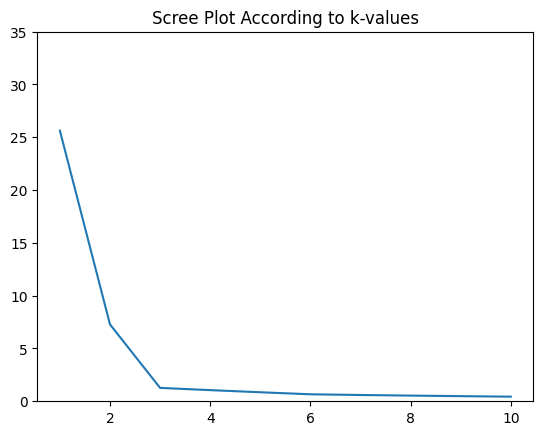

In [27]:
scree(data = df0_25)

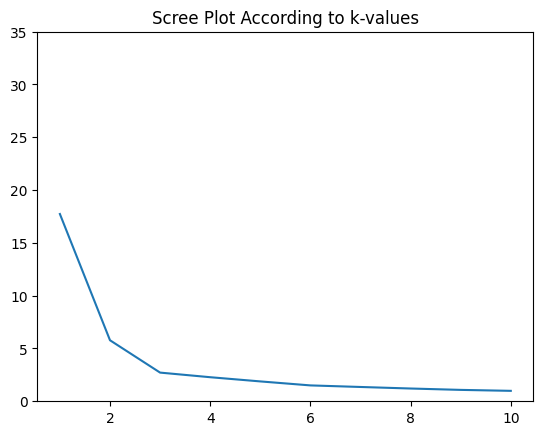

In [28]:
scree(data = df0_5)

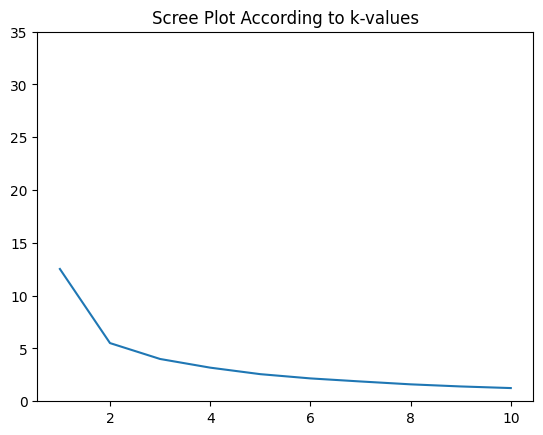

In [29]:
scree(data = df1_0)

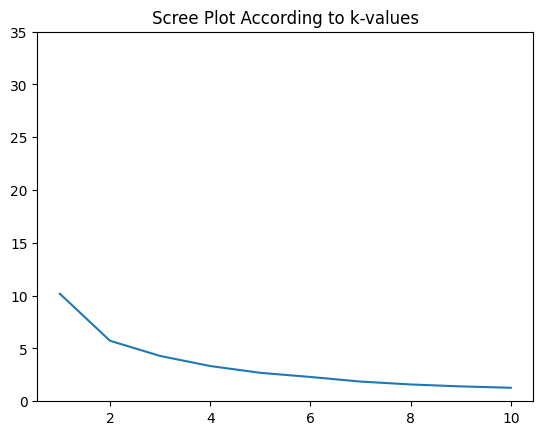

In [30]:
scree(data = df2_0)

3. Each of the graphs of values less than 1.0 had elbows at about 3, whereas the integer values have elbows at about 2. As the value increases, the curve flattens, so it is less visible where the exact elbow value is, and it can be presumed that with values greater than 2, it will be very difficult to determine where an optimal k value would be.

4. The intuition of the elbow is that when the SSE for different values of clusters flatten, there is an optimal number of clusters at the initial drop because the error has decreased a substantial amount, but the clusters are not attempting to overfit. As the datasets and k-values increased, there ended up being higher values for error as the model is attempting to overfit the data, as seen with the slightly higher curves in the scree plots.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?